In [3]:
# Following line downloads FASTA file containing the lambda phage reference genome
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2021-11-09 20:05:41--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.225.125.83, 13.225.125.214, 13.225.125.156, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.225.125.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.1’

lambda_virus.fa.1   100%[===================>]  48.12K  --.-KB/s    in 0.007s  

2021-11-09 20:05:41 (6.49 MB/s) - ‘lambda_virus.fa.1’ saved [49270/49270]



In [1]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('lambda_virus.fa')
genome[:1000]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATA

In [2]:
counts = { 'A': 0, 'C': 0, 'G': 0, 'T': 0 }
for base in genome:
    counts[base] += 1
print(counts)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [3]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

### 1. How many times does **AGGT** or its reverse complement (**ACCT**) occur in the lambda virus genome? E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22

In [11]:
# Count how many times the pattern matched the genome exactly
t = genome
p = 'AGGT'
matches = naive(p, t)
len(matches)

150

In [16]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [18]:
t = genome
p = 'AGGT'
matches = naive(p, t)
matches.extend(naive(reverseComplement(p), t))
len(matches)

306

#### 2. How many times does **TTAA** or its reverse complement occur in the lambda virus genome?  
Hint: **TTAA** and its reverse complement are equal, so remember not to double count.

In [20]:
t = genome
p = 'TTAA'
matches = naive(p, t)
len(matches)

195

#### 3. What is the offset of the leftmost occurrence of **ACTAAGT** or its reverse complement in the Lambda virus genome?  E.g. if the leftmost occurrence of **ACTAAGT** is at offset 40 (0-based) and the leftmost occurrence of its reverse complement **ACTTAGT** is at offset 29, then report 29.

In [27]:
t = genome
p = 'ACTAAGT'
matches = naive(p, t)
matches.extend(naive(reverseComplement(p), t))
leftmost_offset = matches
print(min(leftmost_offset))

26028


#### 4. What is the offset of the leftmost occurrence of **AGTCGA** or its reverse complement in the Lambda virus genome?

In [38]:
t = genome
p = 'AGTCGA'
matches = naive(p, t)
matches.extend(naive(reverseComplement(p), t))
leftmost_offset = matches
print(min(leftmost_offset))
print(matches)
print(genome[450:456])
print(genome[18005:18011])

450
[18005, 23320, 33657, 44806, 450, 1908, 2472, 41927, 45369]
TCGACT
AGTCGA


#### 5. As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

In [4]:
def naive_2mm(p, t):
    occurrences = []
    allowed_mismatches = 2
    for i in range(len(t) - len(p) + 1):
        match = True
        mismatches = 0
        for j in range(len(p)):
            if t[i+j] != p[j]:
                mismatches+=1
        if match and mismatches <= allowed_mismatches:
            occurrences.append(i)
    return occurrences

In [50]:
t = genome
p = 'TTCAAGCC'

matches = naive_2mm(p, t)
print(len(matches))

191


#### 6. What is the offset of the leftmost occurrence of **AGGAGGTT** in the Lambda virus genome when allowing up to 2 mismatches?

In [52]:
t = genome
p = 'TTCAAGCC'

matches = naive_2mm(p, t)
print(min(matches))

45


#### 7. Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question.  The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505. 

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [55]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2021-11-10 14:42:35--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.86.144.119, 99.86.144.48, 99.86.144.197, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.86.144.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K   343KB/s    in 0.7s    

2021-11-10 14:42:37 (343 KB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [10]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [6]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [11]:
def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist

In [12]:
import collections
seqs, quals = readFastq('ERR037900_1.first1000.fastq')
h = createHist(quals)
print(h)

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


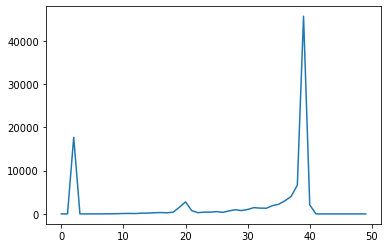

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()